<a href="https://colab.research.google.com/github/ramesitexp/DataScience_Zone/blob/main/FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature Engineering:

1.Feature Transformation

    -missing values
    -outlier handle
    -scaling
    -encoding(categorical data)
    -mathematical (log,exp,box-code)

2.Feature Construction

3.Feature Selection
   -dimension reduction process(PCA)

4.Feature extraction
   -reduce the dimension of the data

1.Scaling

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Social-Networks-Ads/master/Social_Network_Ads.csv")

In [ ]:
df.to_csv("social_net_ads.csv",index=False)

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [ ]:
df=df.iloc[:,2:]

In [ ]:
df

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0
...,...,...,...
395,46.0,41000.0,1
396,51.0,23000.0,1
397,50.0,20000.0,1
398,36.0,33000.0,0


train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.drop("Purchased",axis=1)

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


In [ ]:
df.shape

(400, 3)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df.drop("Purchased",axis=1),df["Purchased"],test_size=0.25)

In [ ]:
X_train

,Age,EstimatedSalary
91,30.0,116000.0
163,35.0,38000.0
13,32.0,18000.0
354,36.0,99000.0
370,60.0,46000.0
...,...,...
79,26.0,17000.0
322,41.0,52000.0
351,37.0,75000.0
276,38.0,71000.0


In [ ]:
X_test

,Age,EstimatedSalary
397,50.0,20000.0
118,40.0,59000.0
82,20.0,49000.0
18,46.0,28000.0
247,57.0,122000.0
...,...,...
391,47.0,23000.0
253,37.0,146000.0
286,37.0,62000.0
87,28.0,85000.0


In [ ]:
y_train

91     0
163    0
13     0
354    1
370    1
      ..
79     0
322    0
351    0
276    0
86     0
Name: Purchased, Length: 300, dtype: int64

In [ ]:
y_test

397    1
118    0
82     0
18     1
247    1
      ..
391    1
253    1
286    0
87     0
173    0
Name: Purchased, Length: 100, dtype: int64

Standard Scalar

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train_scaled=scaler.transform(X_train)

In [ ]:
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [ ]:
X_train_scaled

,Age,EstimatedSalary
0,-0.744345,1.315315
1,-0.260166,-0.943151
2,-0.550673,-1.522245
3,-0.163330,0.823085
4,2.160731,-0.711513
...,...,...
295,-1.131688,-1.551199
296,0.320849,-0.537785
297,-0.066494,0.128173
298,0.030342,0.012354


In [ ]:
X_train.describe()

,Age,EstimatedSalary
count,300.000000,300.000000
mean,37.686667,70573.333333
std,10.344007,34594.419614
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,45.000000,88000.000000
max,60.000000,150000.000000


In [ ]:
X_train_scaled

,Age,EstimatedSalary
0,-0.744345,1.315315
1,-0.260166,-0.943151
2,-0.550673,-1.522245
3,-0.163330,0.823085
4,2.160731,-0.711513
...,...,...
295,-1.131688,-1.551199
296,0.320849,-0.537785
297,-0.066494,0.128173
298,0.030342,0.012354


In [ ]:
import numpy as np
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,-0.0
75%,0.7,0.5
max,2.2,2.3


#Effect on Scaling

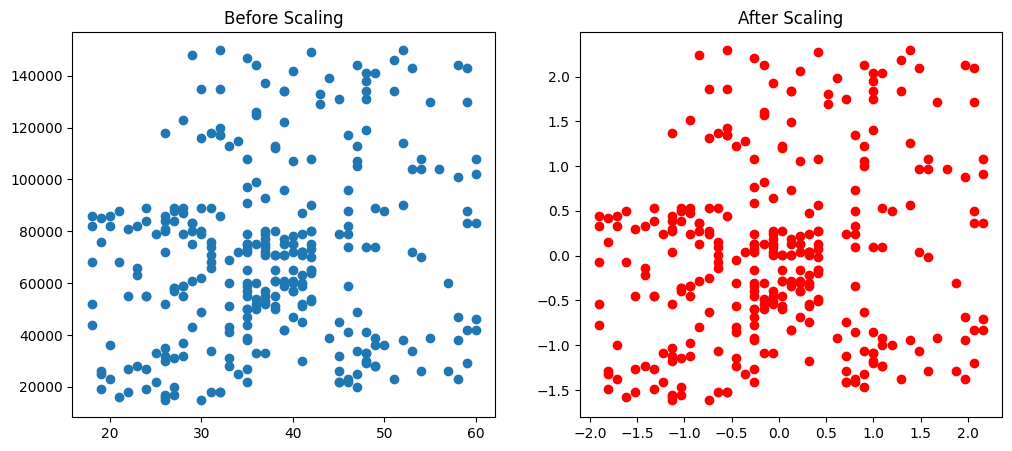

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")

plt.show()

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

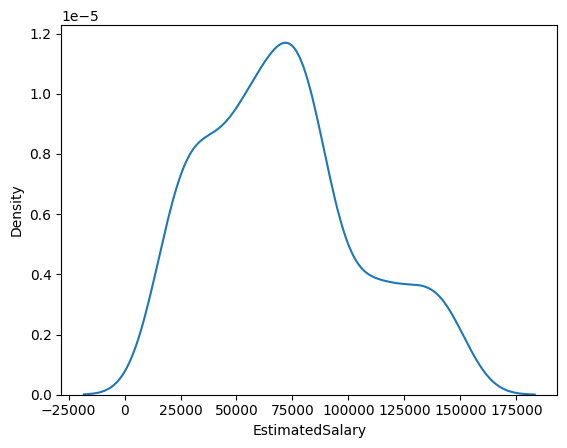

In [ ]:
# model
import seaborn as sns
sns.kdeplot(X_train['EstimatedSalary'])

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

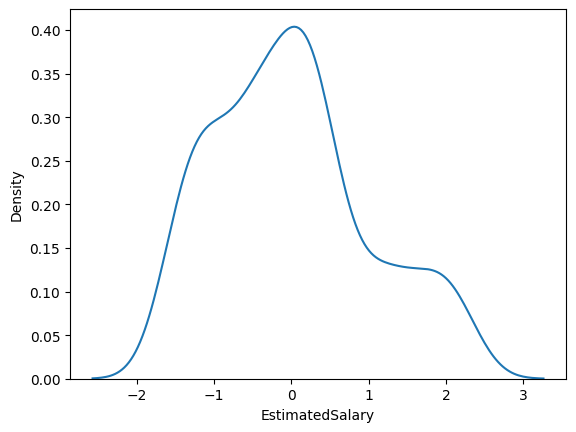

In [ ]:
#model
import seaborn as sns
sns.kdeplot(X_train_scaled['EstimatedSalary'])

In [ ]:
X_train.describe()

,Age,EstimatedSalary
count,300.000000,300.000000
mean,37.686667,70573.333333
std,10.344007,34594.419614
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,45.000000,88000.000000
max,60.000000,150000.000000


In [ ]:
#min-max
from sklearn.preprocessing import MinMaxScaler
scler_min_max=MinMaxScaler()

In [ ]:
scler_min_max.fit(X_train)

MinMaxScaler()

In [ ]:
X_train_min_max=scler_min_max.transform(X_train)

In [ ]:
X_test_min_max=scler_min_max.transform(X_test)

In [ ]:
X_train_min_max

array([[0.28571429, 0.74814815],
       [0.4047619 , 0.17037037],
       [0.33333333, 0.02222222],
       [0.42857143, 0.62222222],
       [1.        , 0.22962963],
       [0.33333333, 0.52592593],
       [0.80952381, 0.17037037],
       [0.45238095, 0.45925926],
       [0.97619048, 0.2       ],
       [0.04761905, 0.05925926],
       [0.5       , 0.88148148],
       [0.52380952, 0.23703704],
       [0.19047619, 0.27407407],
       [0.        , 0.21481481],
       [0.78571429, 0.05925926],
       [0.71428571, 0.13333333],
       [0.54761905, 0.26666667],
       [0.92857143, 0.33333333],
       [0.19047619, 0.        ],
       [0.19047619, 0.14814815],
       [0.45238095, 0.31111111],
       [0.45238095, 0.27407407],
       [0.35714286, 0.11851852],
       [0.47619048, 0.37037037],
       [0.66666667, 0.54074074],
       [0.85714286, 0.68888889],
       [0.23809524, 0.2962963 ],
       [0.4047619 , 0.44444444],
       [0.5952381 , 0.84444444],
       [0.66666667, 0.75555556],
       [0.

In [ ]:
X_test_min_max

array([[0.76190476, 0.03703704],
       [0.52380952, 0.32592593],
       [0.04761905, 0.25185185],
       [0.66666667, 0.0962963 ],
       [0.92857143, 0.79259259],
       [0.97619048, 0.45185185],
       [0.19047619, 0.        ],
       [0.45238095, 0.46666667],
       [0.5       , 0.47407407],
       [1.        , 0.2       ],
       [0.69047619, 0.11111111],
       [0.66666667, 0.12592593],
       [0.54761905, 0.42222222],
       [0.69047619, 0.25925926],
       [0.4047619 , 0.34074074],
       [0.30952381, 0.31851852],
       [0.57142857, 0.28888889],
       [0.14285714, 0.31851852],
       [0.16666667, 0.48148148],
       [0.4047619 , 0.41481481],
       [0.54761905, 0.27407407],
       [0.57142857, 0.65925926],
       [0.9047619 , 0.87407407],
       [0.47619048, 0.25925926],
       [0.92857143, 0.13333333],
       [0.54761905, 0.48148148],
       [0.28571429, 0.01481481],
       [0.19047619, 0.20740741],
       [0.02380952, 0.40740741],
       [0.45238095, 0.48148148],
       [0.

In [ ]:
X_train_min_max = pd.DataFrame(X_train_min_max, columns=X_train.columns)
X_test_min_max = pd.DataFrame(X_test_min_max, columns=X_test.columns)

In [ ]:
np.round(X_train_min_max.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,0.5,0.4
std,0.2,0.3
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.4
75%,0.6,0.5
max,1.0,1.0


In [ ]:
X_test_min_max

,Age,EstimatedSalary
0,0.761905,0.037037
1,0.523810,0.325926
2,0.047619,0.251852
3,0.666667,0.096296
4,0.928571,0.792593
...,...,...
95,0.690476,0.059259
96,0.452381,0.970370
97,0.452381,0.348148
98,0.238095,0.518519


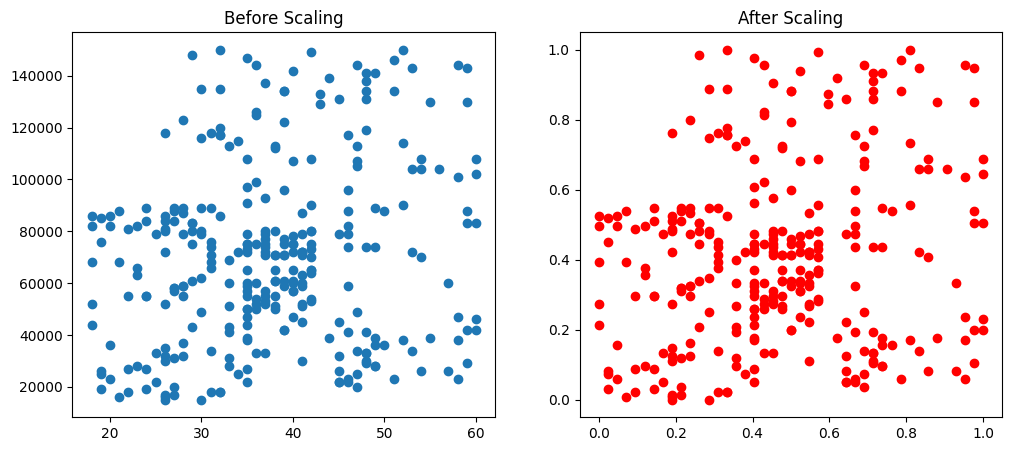

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_min_max['Age'], X_train_min_max['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")

plt.show()

\# when we should use which technique

In [ ]:
CGPA=0 to 1 min-max for the specific range you can use min-max

SALARY= if you dont know the range of the data you can use std_scaler

#ENCODING

In [ ]:
df2=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day26-ordinal-encoding/customer.csv")

In [ ]:
df2.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [ ]:
df2.to_csv("custmor.csv",index=False)

In [ ]:
df2.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [ ]:
df2.sample(5)

,age,gender,review,education,purchased
37,94,Male,Average,PG,Yes
49,25,Female,Good,UG,No
13,57,Female,Average,School,No
4,16,Female,Average,UG,No
40,39,Male,Good,School,No


In [ ]:
df2=df2.iloc[:,2:-1]

In [ ]:
df2.head()

,review,education
0,Average,School
1,Poor,UG
2,Good,PG
3,Good,PG
4,Average,UG


In [ ]:
df2.shape

(50, 2)

In [ ]:
X_train,X_test=train_test_split(df2,test_size=0.25)

In [ ]:
X_train

,review,education
25,Good,School
32,Average,UG
6,Good,School
7,Poor,School
2,Good,PG
27,Poor,PG
38,Good,School
18,Good,School
41,Good,PG
35,Poor,School


In [ ]:
X_test

,review,education
12,Poor,School
11,Good,UG
8,Average,UG
34,Average,School
47,Good,PG
28,Poor,School
30,Average,UG
43,Poor,PG
0,Average,School
44,Average,UG


In [ ]:
df2["review"].value_counts()

review
Poor       18
Good       18
Average    14
Name: count, dtype: int64

In [ ]:
df2["education"].value_counts()

education
PG        18
School    16
UG        16
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
encoder=OrdinalEncoder(categories=[['Poor','Average','Good'],["School","UG","PG"]])

In [ ]:
encoder.fit(X_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [ ]:
X_train_encode=encoder.transform(X_train)

In [ ]:
X_train_encode

array([[2., 0.],
       [1., 1.],
       [2., 0.],
       [0., 0.],
       [2., 2.],
       [0., 2.],
       [2., 0.],
       [2., 0.],
       [2., 2.],
       [0., 0.],
       [2., 0.],
       [0., 2.],
       [2., 1.],
       [1., 0.],
       [0., 2.],
       [2., 1.],
       [0., 2.],
       [2., 2.],
       [2., 2.],
       [2., 1.],
       [0., 1.],
       [0., 1.],
       [2., 1.],
       [1., 1.],
       [2., 2.],
       [2., 1.],
       [0., 2.],
       [0., 1.],
       [1., 0.],
       [1., 2.],
       [0., 0.],
       [0., 1.],
       [0., 2.],
       [1., 2.],
       [1., 2.],
       [2., 0.],
       [0., 2.]])

In [ ]:
encoder.transform(X_test)

array([[0., 0.],
       [2., 1.],
       [1., 1.],
       [1., 0.],
       [2., 2.],
       [0., 0.],
       [1., 1.],
       [0., 2.],
       [1., 0.],
       [1., 1.],
       [0., 2.],
       [1., 1.],
       [1., 0.]])

In [ ]:
df2.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [ ]:
df2=df2[["gender","age"]]

In [ ]:
df2

,gender,age
0,Female,30
1,Female,68
2,Female,70
3,Female,72
4,Female,16
5,Female,31
6,Male,18
7,Female,60
8,Female,65
9,Male,74


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe=OneHotEncoder(drop="first",sparse=False,dtype=np.int32)

In [ ]:
ohe.fit(df2[["gender"]])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='first', dtype=<class 'numpy.int32'>, sparse=False,
              sparse_output=False)

In [ ]:
ohe.transform(df2[["gender"]])

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [ ]:
# handle missing value

df3=pd.read_csv("train.csv")

In [ ]:
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df3=df3[["Age","Fare","SibSp","Survived"]]

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [ ]:
df3.head()

,Age,Fare,SibSp,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [ ]:
df3.isnull().sum()

Age         177
Fare          0
SibSp         0
Survived      0
dtype: int64

In [ ]:
df3.isnull().mean()

Age         0.198653
Fare        0.000000
SibSp       0.000000
Survived    0.000000
dtype: float64

In [ ]:
# numeric--> mean,median

# cat--> mode

In [ ]:
X_train,X_test=train_test_split(df3,test_size=0.25)

In [ ]:
X_train

,Age,Fare,SibSp,Survived
872,33.0,5.0000,0,0
282,16.0,9.5000,0,0
13,39.0,31.2750,1,0
616,34.0,14.4000,1,0
727,NaN,7.7375,0,1
...,...,...,...,...
9,14.0,30.0708,1,1
858,24.0,19.2583,0,1
516,34.0,10.5000,0,1
828,NaN,7.7500,0,1


In [ ]:
X_test

,Age,Fare,SibSp,Survived
393,23.0,113.2750,1,1
751,6.0,12.4750,0,1
272,41.0,19.5000,0,1
320,22.0,7.2500,0,0
189,36.0,7.8958,0,0
...,...,...,...,...
548,33.0,20.5250,1,0
562,28.0,13.5000,0,0
587,60.0,79.2000,1,1
642,2.0,27.9000,3,0


In [ ]:
mean_age=X_train["Age"].mean()

In [ ]:
mean_age

29.17556179775281

In [ ]:
X_train["Age"].fillna(mean_age)

872    33.000000
282    16.000000
13     39.000000
616    34.000000
727    29.175562
         ...    
9      14.000000
858    24.000000
516    34.000000
828    29.175562
739    29.175562
Name: Age, Length: 668, dtype: float64

In [ ]:
mediann_age=X_train["Age"].median()

In [ ]:
mediann_age

28.0

In [ ]:
X_train["Age"].fillna(mediann_age)

872    33.0
282    16.0
13     39.0
616    34.0
727    28.0
       ... 
9      14.0
858    24.0
516    34.0
828    28.0
739    28.0
Name: Age, Length: 668, dtype: float64

In [ ]:
#sklearn

# simpleimputer

In [ ]:
df3["Cabin"].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [ ]:
df3["Cabin"].fillna(df3["Cabin"].mode()[0])

0      B96 B98
1          C85
2      B96 B98
3         C123
4      B96 B98
        ...   
886    B96 B98
887        B42
888    B96 B98
889       C148
890    B96 B98
Name: Cabin, Length: 891, dtype: object

In [ ]:
# multivariate

# knnimputer

- Exploring Features of the dataset
- Hypothesis Testing
- Checking for Normal Distribution using Transformations

###  Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [46]:
df=pd.read_csv('data/cleaned.csv')

#### Show Top 5 Records

In [16]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### OUTLIERS DETECTION & REMOVAL approaches
* Identifying outliers with visualization
* Z-score method
* Interquartile Range Method( IQR ) method
* Compare Skewness

In [ ]:
### Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#### Import the CSV Data as Pandas DataFrame

In [62]:
df = pd.read_csv('data/cleaned.csv')

# 1. Identifying outliers with visualization

In [64]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_df=df[num_features]
num_df.head()

,math score,reading score,writing score,total score,average
0,72,72,74,218,72.666667
1,69,90,88,247,82.333333
2,90,95,93,278,92.666667
3,47,57,44,148,49.333333
4,76,78,75,229,76.333333


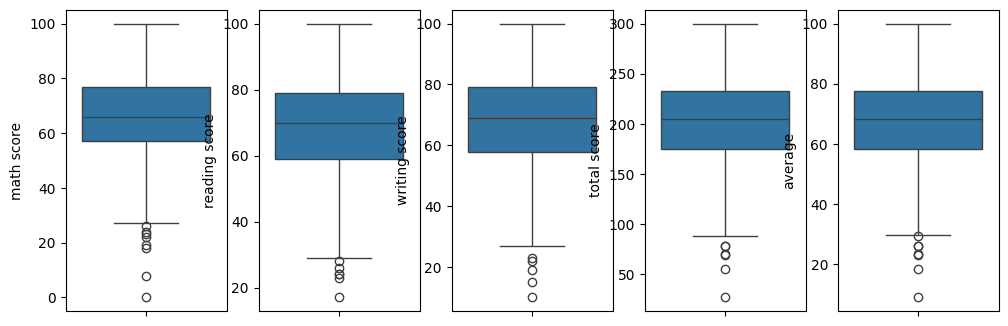

In [65]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])

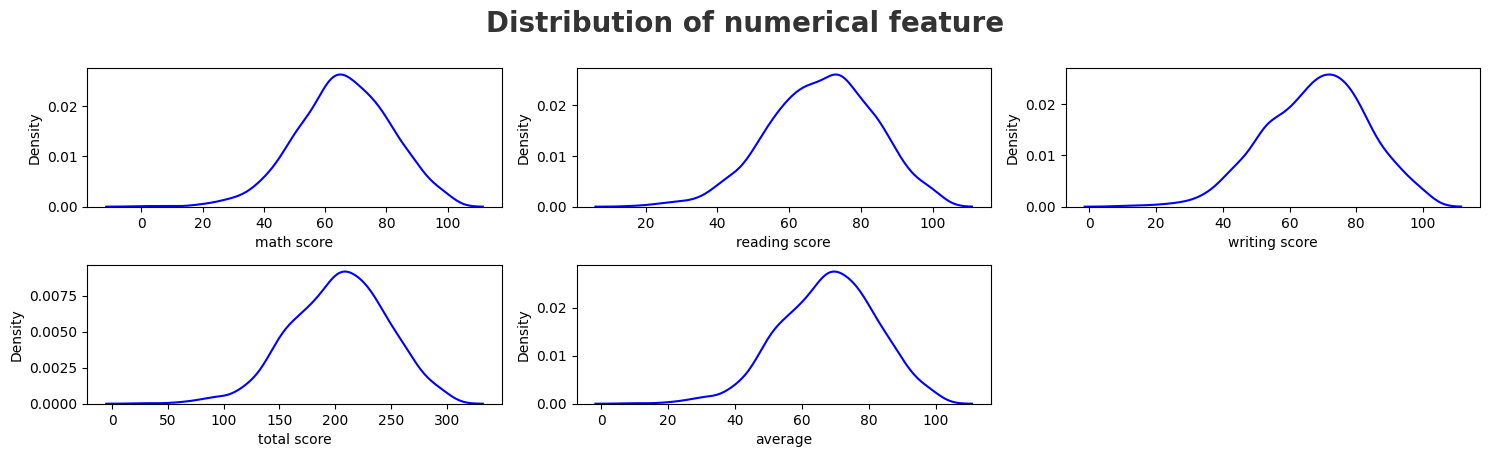

In [66]:
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution of numerical feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

#### Insigths
- The outliers are there ,as there are many data points which lie far away from maximum points.

In [68]:
obj = ['race/ethnicity','parental level of education','lunch','test preparation course','gender']
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
x = df.drop(obj,axis = 1)
for i in x.columns:
    count_outliers(x,i)

There are outliers in math score
Count of outliers are: 8
There are outliers in reading score
Count of outliers are: 6
There are outliers in writing score
Count of outliers are: 5
There are outliers in total score
Count of outliers are: 6
There are outliers in average
Count of outliers are: 7


### 2 .  Z-score  method
#### Z-score:
- The number of standard deviations away from the mean that a particular observation is.
- A negative Z-score means an observation is below the mean.
- while a positive Z-score means means it above the mean.
- The further away from 0 the Z-Score is, the further away from the mean your observation is.

In [69]:
# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [70]:
## function to remove outliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [71]:
replace_with_thresholds(num_df, num_df.columns)

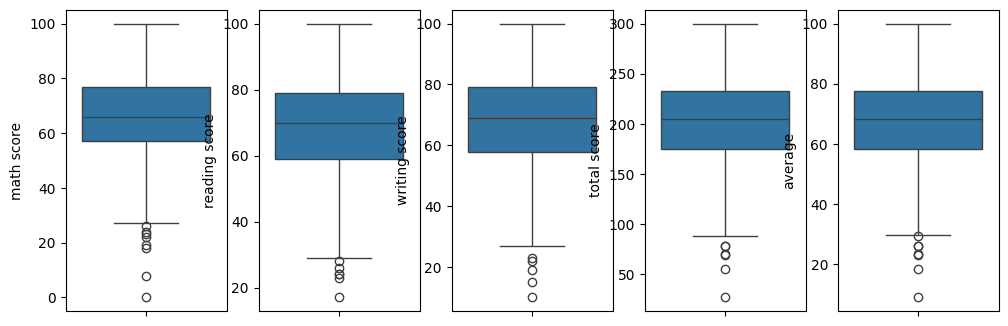

In [72]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])

#### Insights
- As we can see from above boxplots outliers are not removed properly

### 3.  Interquartile Range Method( IQR ) method

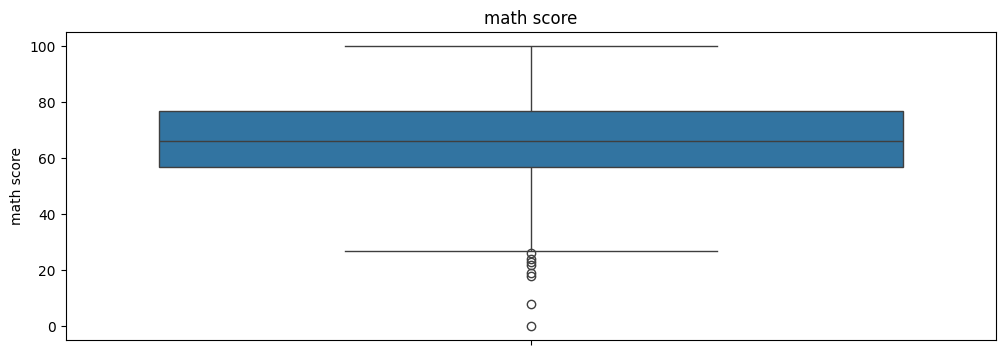

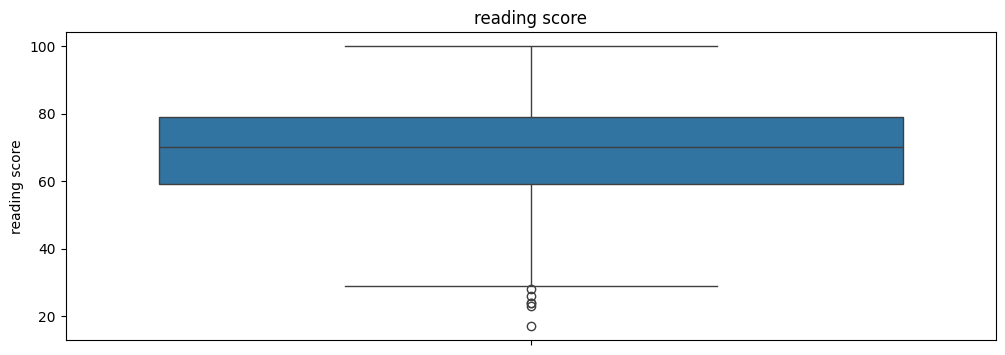

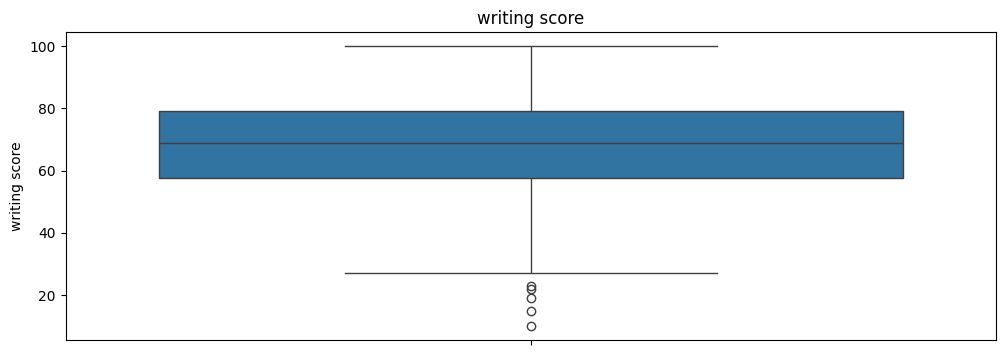

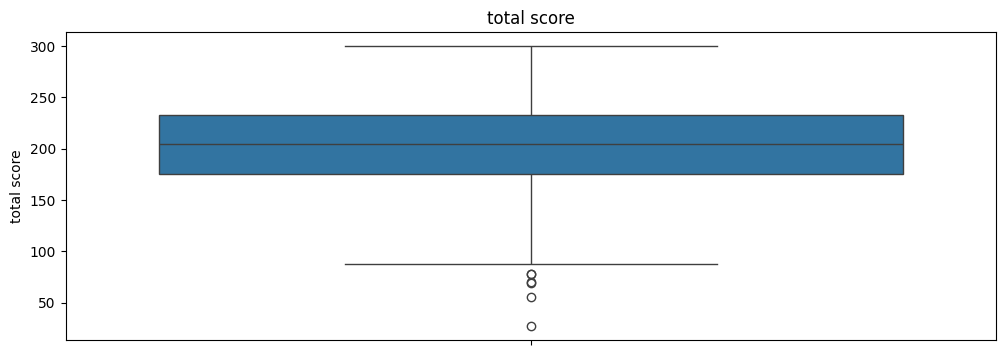

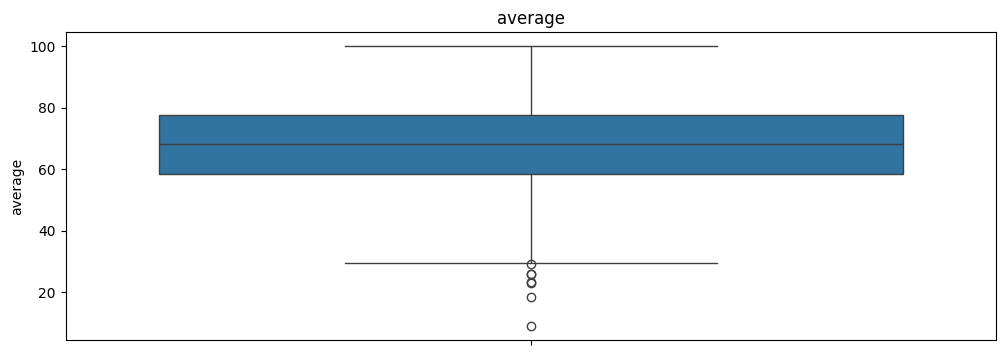

In [74]:
for col in num_df.columns:
    plt.figure(figsize=(12,4))
    sns.boxplot(df[col])
    plt.title(col)

In [75]:
df1 = df.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]

In [76]:
remove_outliers_IQR('math score')

percentile25 57.0
percentile75 77.0
Upper limit 107.0
Lower limit 27.0


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average


In [77]:
def create_comparison_plot(df,df1,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[column])

    plt.subplot(2,2,2)
    sns.boxplot(df[column])

    plt.subplot(2,2,3)
    sns.distplot(df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(df1[column])

    plt.show()

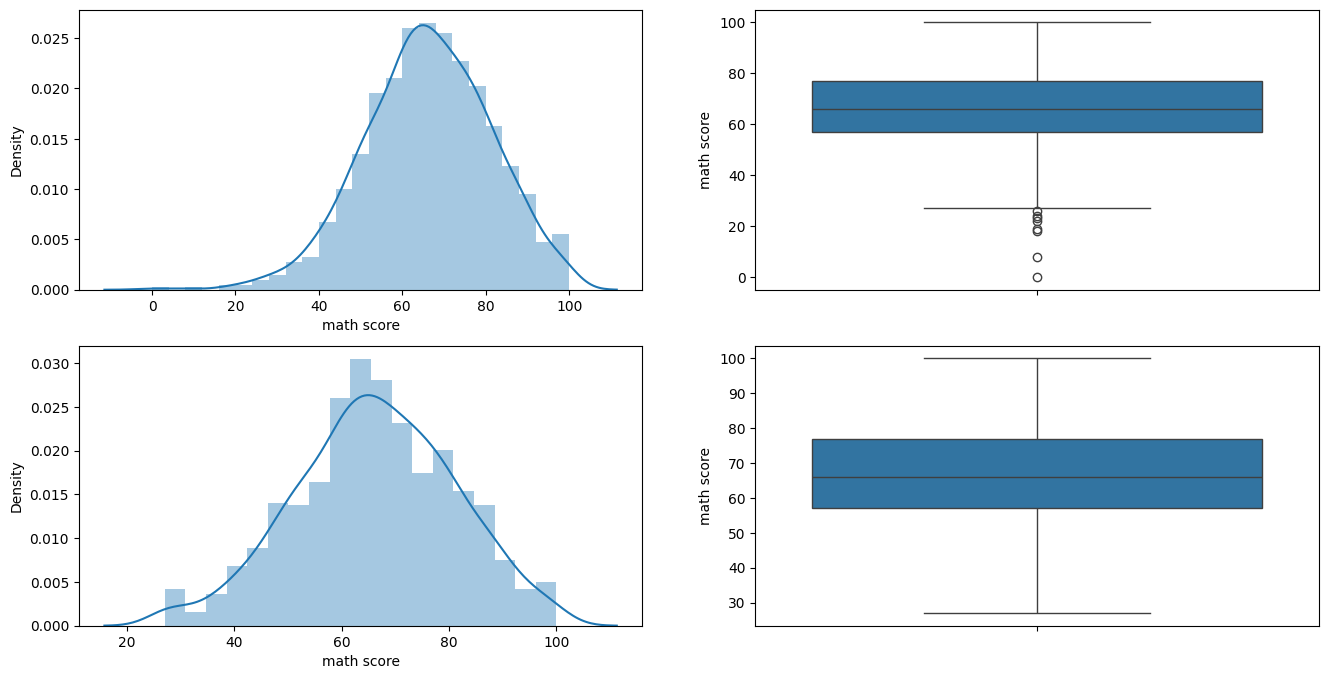

In [78]:
create_comparison_plot(df,df1,"math score")

remove_outliers_IQR('reading score')

In [79]:
remove_outliers_IQR('reading score')

percentile25 59.0
percentile75 79.0
Upper limit 109.0
Lower limit 29.0


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average


In [80]:
remove_outliers_IQR('writing score')

percentile25 57.75
percentile75 79.0
Upper limit 110.875
Lower limit 25.875


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average


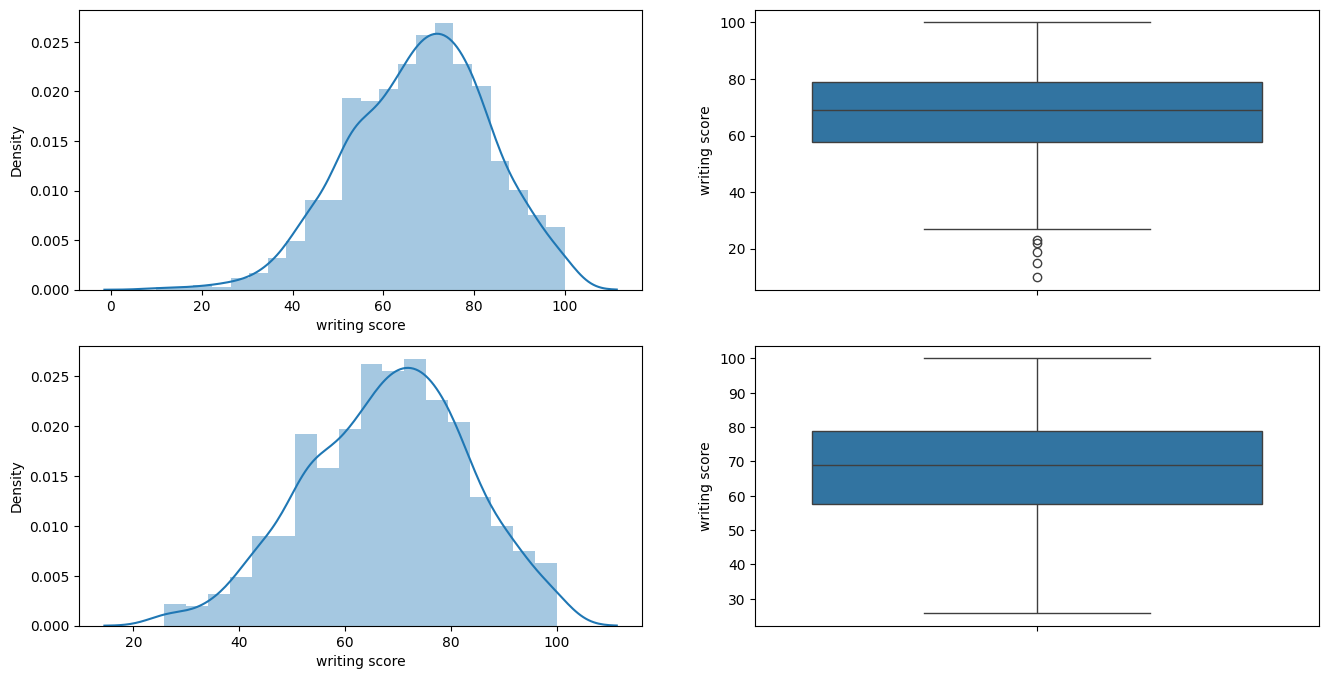

In [81]:
create_comparison_plot(df,df1,"writing score")

In [82]:
remove_outliers_IQR('total score')

percentile25 175.0
percentile75 233.0
Upper limit 320.0
Lower limit 88.0


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average


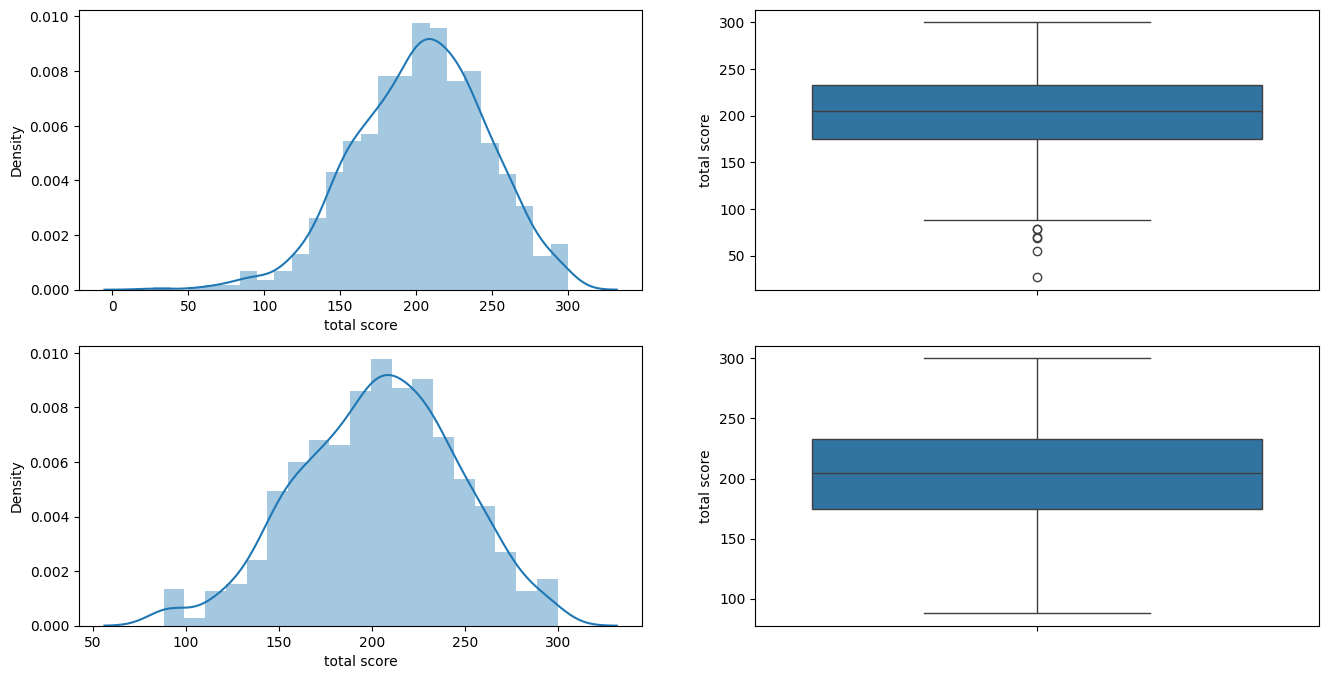

In [83]:
create_comparison_plot(df,df1,"total score")

In [84]:
remove_outliers_IQR('average')

percentile25 58.333333333333336
percentile75 77.66666666666667
Upper limit 106.66666666666667
Lower limit 29.333333333333332


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average


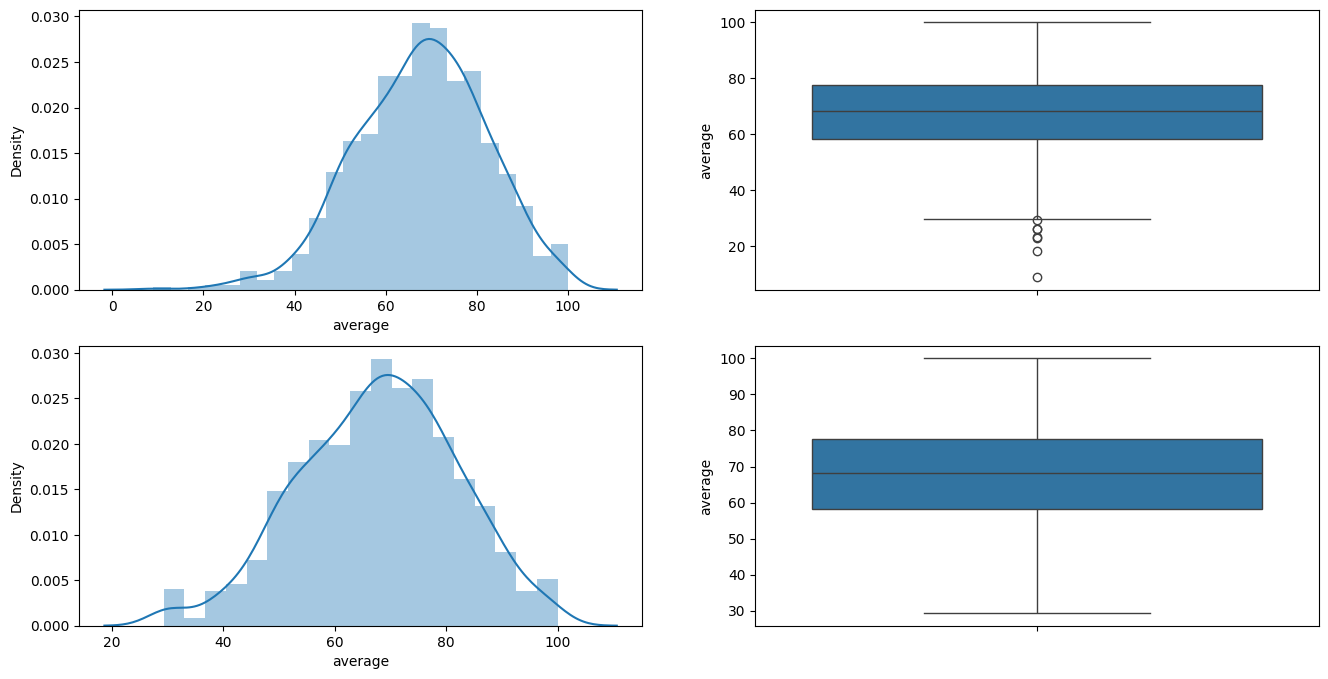

In [85]:
create_comparison_plot(df,df1,"average")

### 4. Compare Skewness

In [88]:
df=[col for col in df.columns if df[col].dtype!='O']
df=df[df]

AttributeError: 'list' object has no attribute 'columns'

In [86]:
df.skew()

TypeError: could not convert string to float: 'female'

In [89]:
df1.skew()

TypeError: could not convert string to float: 'female'

#### Insights
- Skewness is reduced after we have removed ouliers using IQR Method

In [ ]:
df.to_csv('outlier_removed.csv', index=False)

#Stat Based Analysis

---



### 2 .Hypothesis Testing
#### 2.1 Checking correlation

In [43]:
df = df.select_dtypes(exclude='object')



In [18]:
df.head()

,math score,reading score,writing score,total score,average
0,72,72,74,218,72.666667
1,69,90,88,247,82.333333
2,90,95,93,278,92.666667
3,47,57,44,148,49.333333
4,76,78,75,229,76.333333


In [19]:
df.corr()

,math score,reading score,writing score,total score,average
math score,1.000000,0.817580,0.802642,0.918746,0.918746
reading score,0.817580,1.000000,0.954598,0.970331,0.970331
writing score,0.802642,0.954598,1.000000,0.965667,0.965667
total score,0.918746,0.970331,0.965667,1.000000,1.000000
average,0.918746,0.970331,0.965667,1.000000,1.000000


In [7]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
total score                      int64
average                        float64
dtype: object

In [20]:
num_data = ['math score','reading score','writing score']

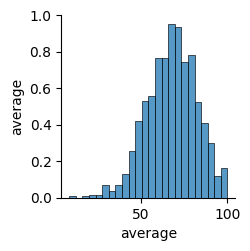

In [21]:
sns.pairplot(df.iloc[:,4:8])

#### Insights
- All of the pairplots seems to have a linear relationship with the other variable. To clarify that we'll plot the correlation map.

In [24]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_df=df[num_features]

In [ ]:
#### 2.2  Shapiro Wick Test
* **The Shapiro-Wilk test is a way to tell if a random sample comes from a normal distribution.**

- Ho : Data is normally distributed
- H1 : Data is not normally distributed

In [25]:
  from scipy.stats import shapiro

shapiro_wick_test = []

for column in num_features:

    dataToTest = num_df[column]

    stat,p = shapiro(dataToTest)

    if p > 0.05:

        shapiro_wick_test.append("Normally Distributed")

    else:
        shapiro_wick_test.append("Not Normally Distributed")

result = pd.DataFrame(data=[num_features, shapiro_wick_test]).T
result.columns = ['Column Name', 'Shapiro Hypothesis Result']
result

,Column Name,Shapiro Hypothesis Result
0,math score,Not Normally Distributed
1,reading score,Not Normally Distributed
2,writing score,Not Normally Distributed
3,total score,Not Normally Distributed
4,average,Not Normally Distributed


#### 2.3 K^2 Normality Test
* **Test aims to establish whether or not the given sample comes from a normally distributed population. Test is based on transformations of the sample kurtosis and skewness**

- Ho : Data is normally distributed
- H1 : Data is not normally distributed

In [28]:
from scipy.stats import normaltest

normaltest_test = []

for column in num_features:

    dataToTest = num_df[column]

    stat,p = normaltest(dataToTest)
    print(stat,p)

    if p > 0.05:
        normaltest_test.append("Normally Distributed")

    else:
        normaltest_test.append("Not Normally Distributed")

result = pd.DataFrame(data=[num_features, normaltest_test]).T
result.columns = ['Column Name', 'normaltest Hypothesis Result']
result

15.408960513931822 0.00045080293869937836
11.11741279628622 0.003853758403576582
13.606450837263859 0.0011101885439899974
15.18672132723161 0.0005037851534493755
15.186721327231306 0.0005037851534494518


,Column Name,normaltest Hypothesis Result
0,math score,Not Normally Distributed
1,reading score,Not Normally Distributed
2,writing score,Not Normally Distributed
3,total score,Not Normally Distributed
4,average,Not Normally Distributed


#### 2.4 Spearmanr Test

* **Spearman Rank Correlation, which is used to measure the correlation between two ranked variables**
* **Whereas The Pearson correlation coefficient is computed using raw data values**
* **Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed.**
* **Spearman rank correlation is closely related to the Pearson correlation, and both are a bounded value, from -1 to 1 denoting a correlation between two variables.**
- Ho : Independent Samples
- H1 : Dependent Samples

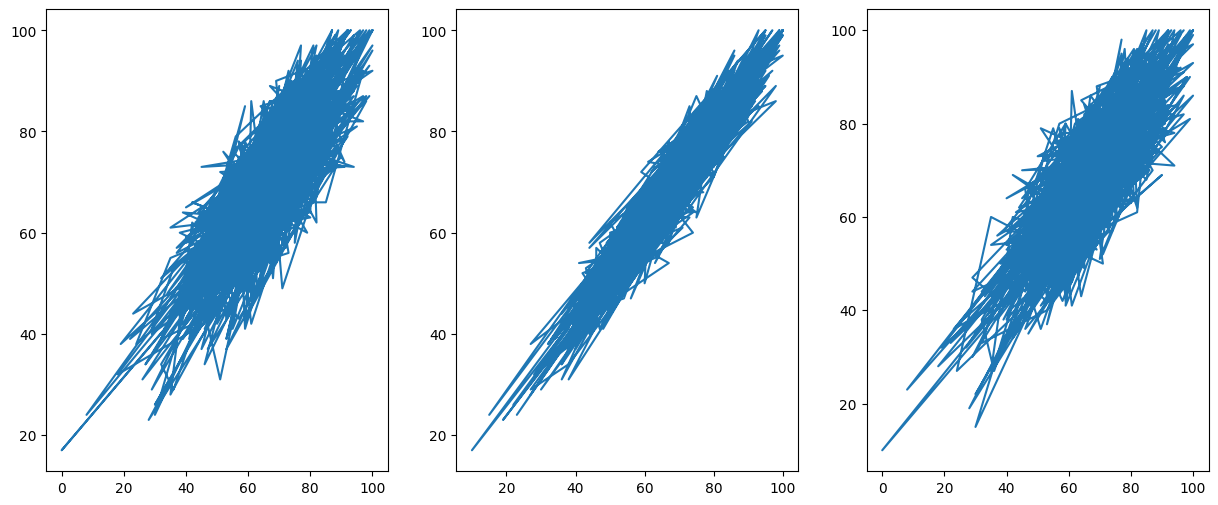

In [29]:
plt.rcParams["figure.figsize"] = (15,6)
plt.subplot(1, 3, 1)
plt.plot(num_df['math score'],num_df['reading score'])
plt.subplot(1, 3, 2)
plt.plot(num_df['writing score'],num_df['reading score'])
plt.subplot(1, 3, 3)
plt.plot(num_df['math score'],num_df['writing score'])
plt.show()

#### Insight
- We can observe linear relationship amoung two varibales.
- lets prove it hypothetically too using spearman Rank and Pearson Correlation Tests.

In [31]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

def test_correlation(test_name,column1, column2):
    column1_to_test = num_df[column1]
    column2_to_test = num_df[column2]
    stat,p = test_name(column1_to_test , column2_to_test)
    d =dict()
    d['col1'] = column1
    d['col2'] = column2
    if p> 0.05:
        test_results.append("Independent Samples")
    else:
        test_results.append("Dependent Samples")
    columns_combination.append(d)

In [32]:
columns_combination = []
test_results = []
test_correlation(spearmanr,'math score','reading score')

In [33]:
test_correlation(spearmanr,'writing score','reading score')

In [34]:
test_correlation(spearmanr,'math score','writing score')

In [35]:
df_spearmanr = pd.DataFrame(columns_combination,test_results)
df_spearmanr

,col1,col2
Dependent Samples,math score,reading score
Dependent Samples,writing score,reading score
Dependent Samples,math score,writing score


####  2.5 pearsonr Test
- Ho : Independent Samples
- H1 : Dependent Samples

In [36]:
columns_combination = []
test_results = []
test_correlation(pearsonr,'math score','reading score')

In [37]:
test_correlation(pearsonr,'writing score','reading score')

In [38]:
test_correlation(pearsonr,'math score','writing score')

In [39]:
df_pearsonr = pd.DataFrame(columns_combination,test_results)
df_pearsonr

,col1,col2
Dependent Samples,math score,reading score
Dependent Samples,writing score,reading score
Dependent Samples,math score,writing score


#### Result
- At 5% level of significance
- From above two tests of Pearsonr and Spearmanr ,
- since all the three p-values are more than 0.05.
- Inference: The scores have a correlation between them.

In [40]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#### 2.6 Chi-squared test
* **Tests whether two categorical fetaures are dependent or Not.**
* Here we will test correlation of Categorical columns with Target column i.e average
* Assumptions-
 - All are Independent observation
 - Size of each box of contingency table > 25

In [41]:
from scipy.stats import chi2_contingency
chi2_squared_test = []
for feature in categorical_features:
    stat, p , dof, expected = chi2_contingency(pd.crosstab(df['average'], df[feature]))
    if p> 0.05:
        chi2_squared_test.append("Independent Categories")
    else:
        chi2_squared_test.append("Dependent Categories")
result = pd.DataFrame(data=[categorical_features, chi2_squared_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result


**Insights**
* Here our output is dependent on Lunch & Test preparation course columns

#### 2.7 Levene's Test
* **Equality of variance test**

- Ho : Female and male have equal variance
- H1 : Female and male do not have equal variance

In [45]:
df.head()

,math score,reading score,writing score,total score,average
0,72,72,74,218,72.666667
1,69,90,88,247,82.333333
2,90,95,93,278,92.666667
3,47,57,44,148,49.333333
4,76,78,75,229,76.333333


In [47]:
math_var = scipy.stats.levene(df[df['gender']=='female']['math score'],
                  df[df['gender']=='male']['math score'], center = 'mean')
reading_var = scipy.stats.levene(df[df['gender']=='female']['reading score'],
                  df[df['gender']=='male']['reading score'], center = 'mean')
writing_var = scipy.stats.levene(df[df['gender']=='female']['writing score'],
                  df[df['gender']=='male']['writing score'], center = 'mean')
print("Test Statistic and p-value for math  is", math_var)
print('\n')
print("Test Statistic and p-value for writing is", writing_var)
print('\n')
print("Test Statistic and p-value for reading is", reading_var)

Test Statistic and p-value for math  is LeveneResult(statistic=0.39659058260357727, pvalue=0.5289994390328784)


Test Statistic and p-value for writing is LeveneResult(statistic=0.029036281877215228, pvalue=0.8647298283415281)


Test Statistic and p-value for reading is LeveneResult(statistic=0.016652697287322132, pvalue=0.8973477814233404)


#### Result
- Conclusion : Since, at 5% level of significance, P(calculated) > P(0.05).
- Therefore we will accept the null hypothesis
- Inference : All the scores have equal variance with respect to gender.

#### 2.8 Checking Correlation using Heatmaps

In [49]:
# Select columns that are not of object data type
df = df.select_dtypes(exclude='object')

# Check the DataFrame head to confirm only non-object columns remain
df.head()

,math score,reading score,writing score,total score,average
0,72,72,74,218,72.666667
1,69,90,88,247,82.333333
2,90,95,93,278,92.666667
3,47,57,44,148,49.333333
4,76,78,75,229,76.333333


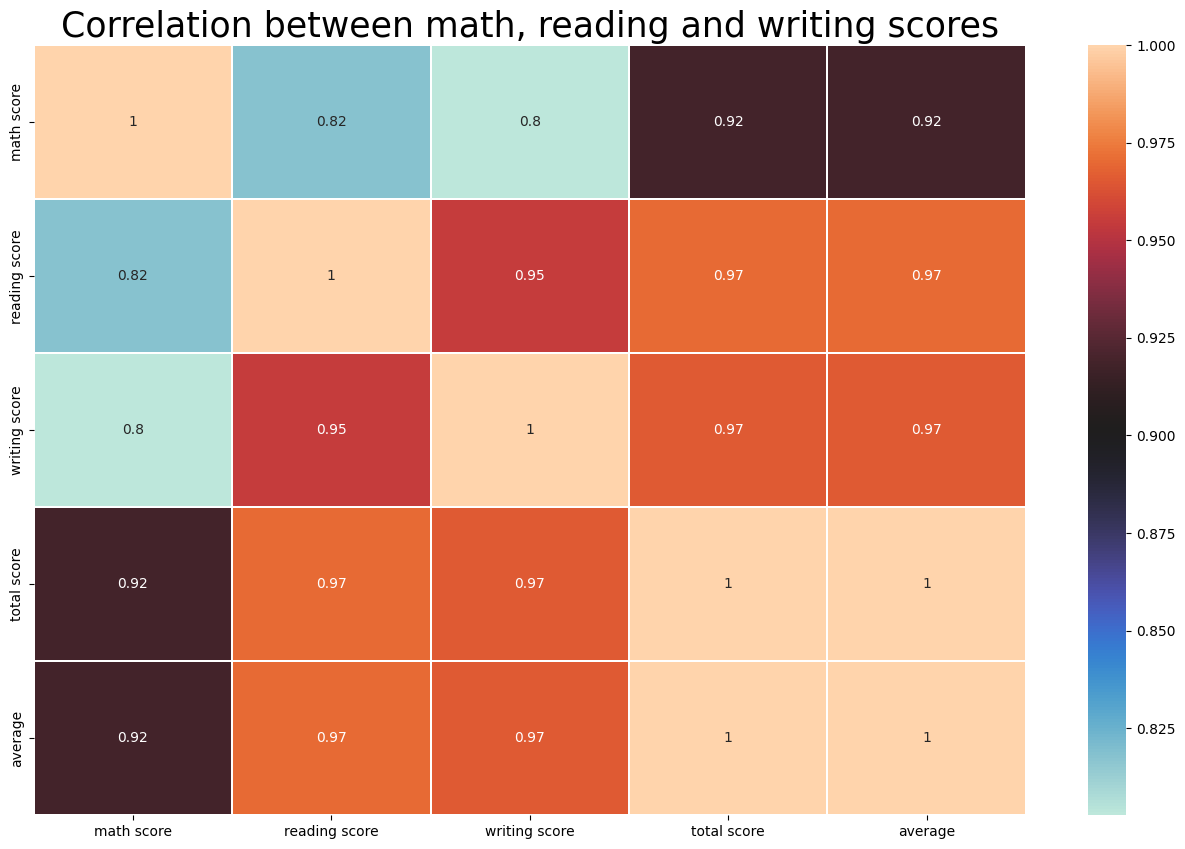

In [50]:
 # Relationship analysis
sns.heatmap(df.corr(),annot=True,cmap='icefire',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(16,10)
#fig.title('corelation between math, reading and writing scores')
plt.title('Correlation between math, reading and writing scores',color='black',size=25)
plt.show()

#### Insights
- Total_score is highly correlated with individual score.
- Reading score is also highly correlated with writing score which means students who reads well can also writes well.
- Math_score doesnt have much high correlation so it is not neccessary that if a student performs well in maths has to perform well in other aspects or vice-versa
- Total_score and average are highy correlated , hence we can delete one amoung them.

###  3 . Checking for Normal Distribution using Transformations
- Q-Q plot (to check if data is normally distributed or not)

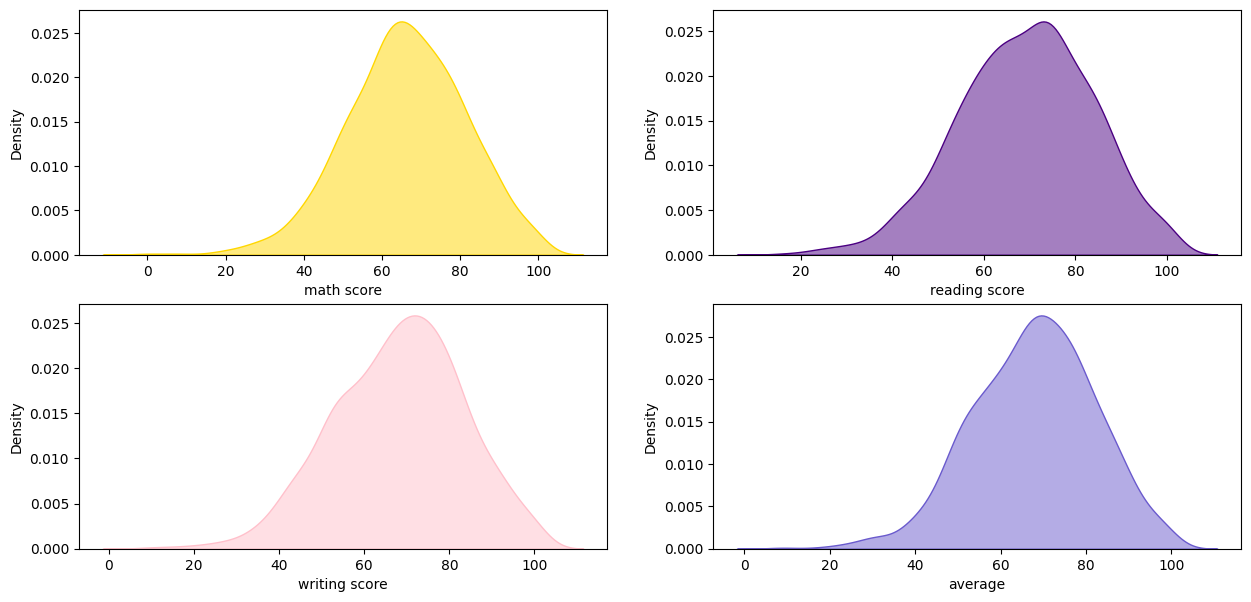

In [51]:
# density plot using seaborn library
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

sns.kdeplot(df['math score'],shade=True,label='Maths',color='gold',ax=axs[0, 0],alpha=0.5)
sns.kdeplot(df['reading score'],shade=True,label='Reading',color='indigo',ax=axs[0, 1],alpha=0.5)
sns.kdeplot(df['writing score'],shade=True,label='Writing',color='pink',ax=axs[1, 0],alpha=0.5)
sns.kdeplot(df['average'],shade=True,label='Total',color='slateblue',ax=axs[1, 1],alpha=0.5)
plt.show()

In [52]:
def plots(df,var,t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.distplot(df[var])
    plt.title('before' + str(t))
    plt.subplot(122)
    sns.distplot(t)
    plt.title('After' + str(t))
    plt.show()

#### 3.1 Log Transform

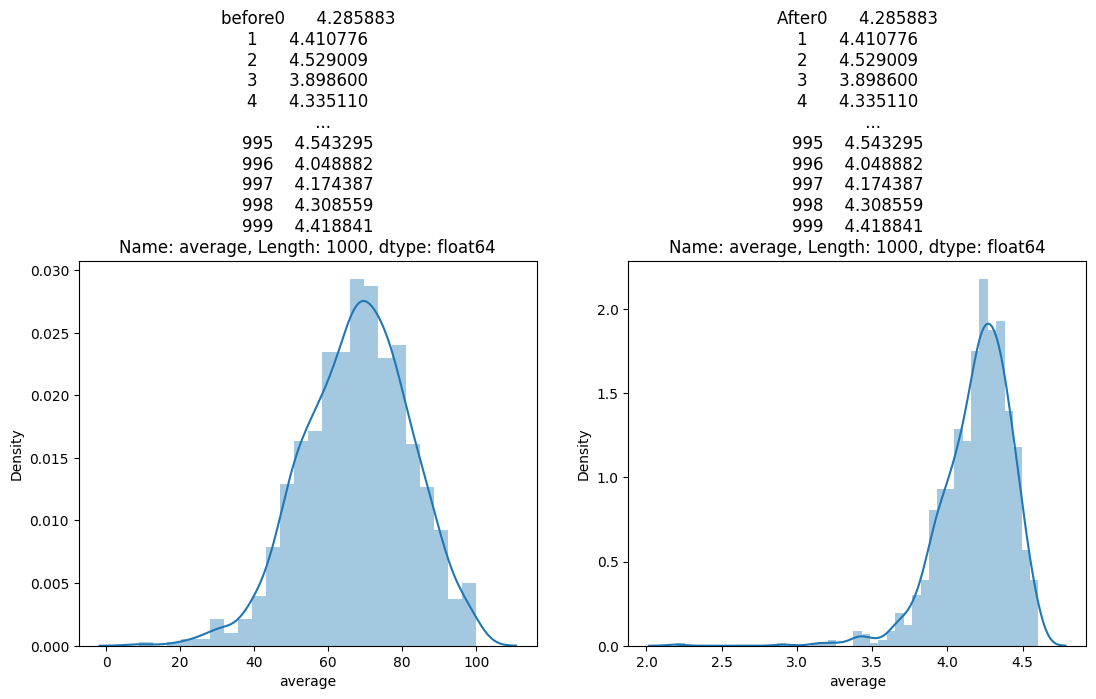

Skewness value -1.5373448376786043


In [53]:
plots(df,'average',np.log(df['average']))
print("Skewness value", np.log(df['average']).skew())

#### Insights
- A negatively skewed (also known as left-skewed) distribution is a type of distribution in which more values are concentrated on the right side (tail) of the distribution graph while the left tail of the distribution graph is longer.

#### 3.2. Square Root Transform

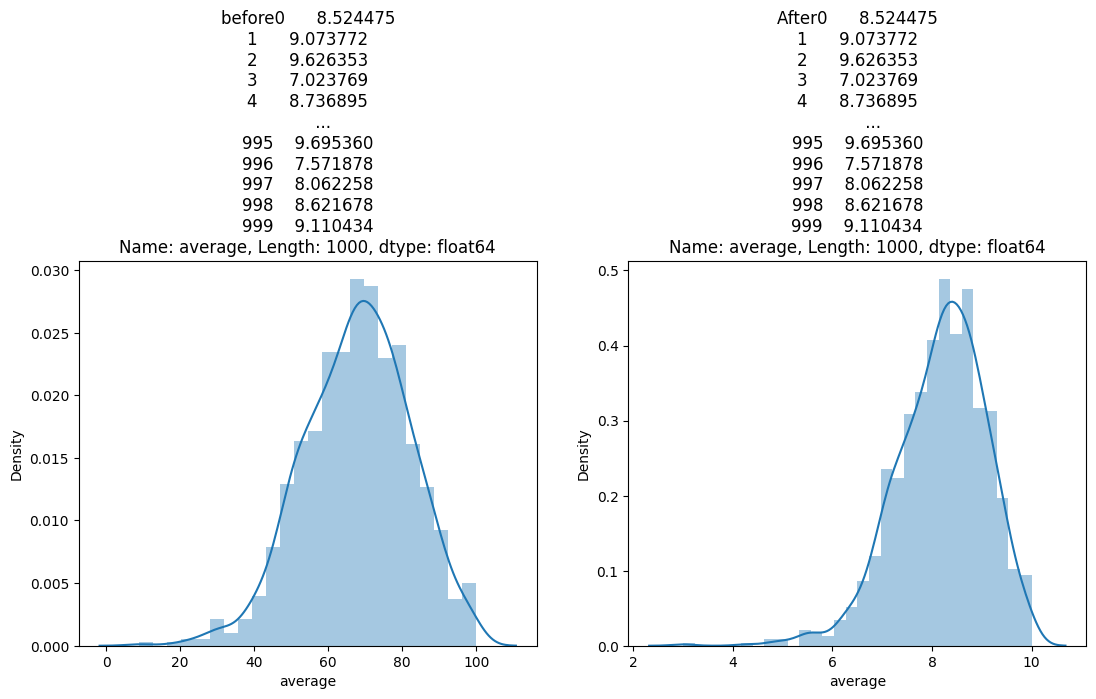

Skewness value -0.7534310044571916


In [54]:
plots(df,'average',np.sqrt(df['average']))
print("Skewness value", np.sqrt(df['average']).skew())

### 3.3 Box-Cox Transform
- Assumption -
 * your data must be positive

# here i am ploting the distribution and qq plot

In [55]:
def plot_qq_plot(column):
    plt.figure(figsize=(14,4))
    plt.subplot(121)

    sns.distplot(df[column])

    plt.title("{} PDF".format(column))

    plt.subplot(122)

    stats.probplot(df[column], dist="norm", plot=plt)

    plt.title('{} QQ Plot'.format(column))
    plt.show()

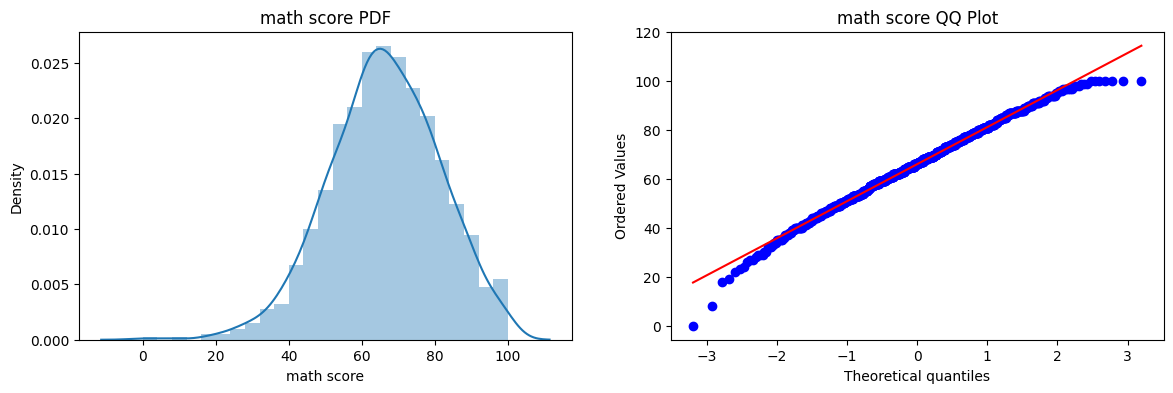

In [56]:
plot_qq_plot('math score')

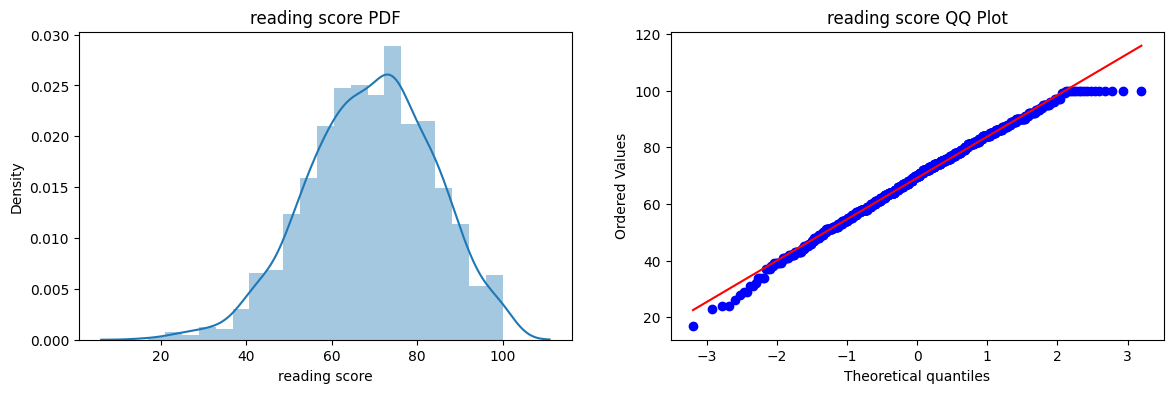

In [57]:
plot_qq_plot('reading score')

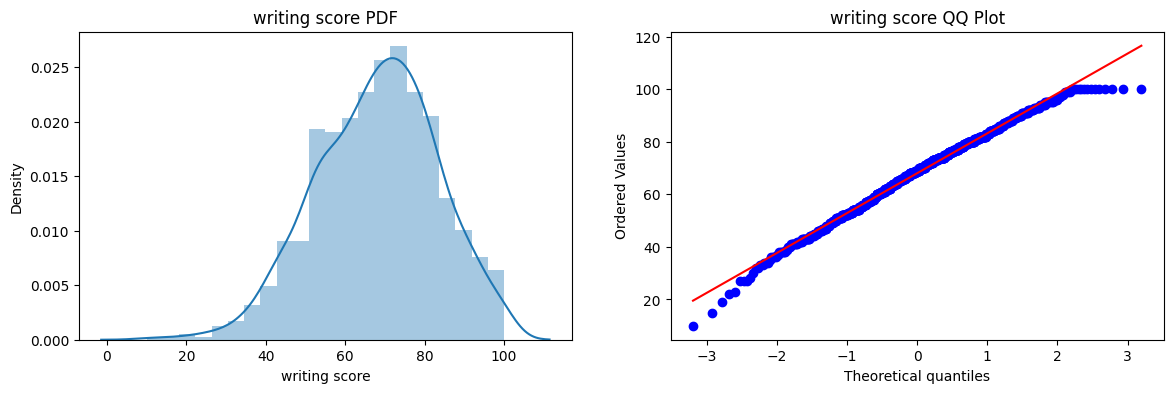

In [58]:
plot_qq_plot('writing score')

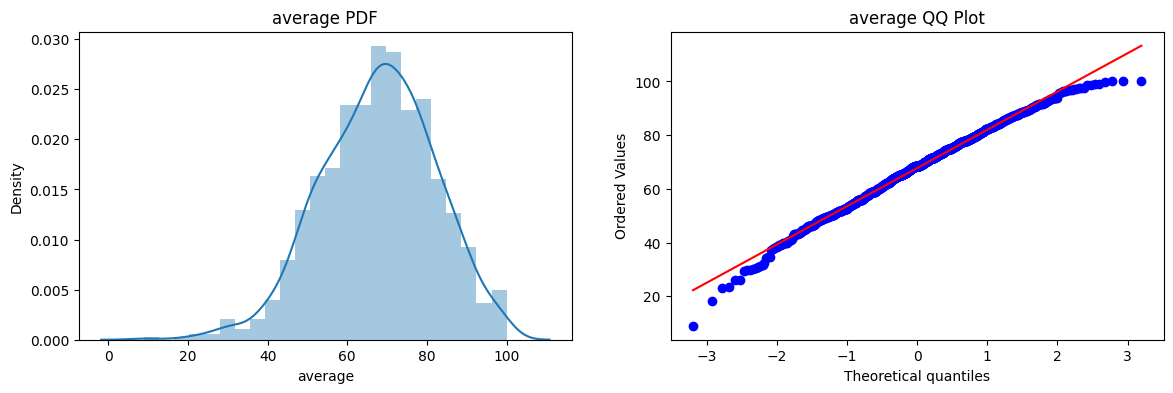

In [59]:
plot_qq_plot('average')

#### Insights
-  For range -2 to 2 avg_score & math score follows normal distribution, but for values less than -2 and for values greater than 2 it doesn't follow normal distribution

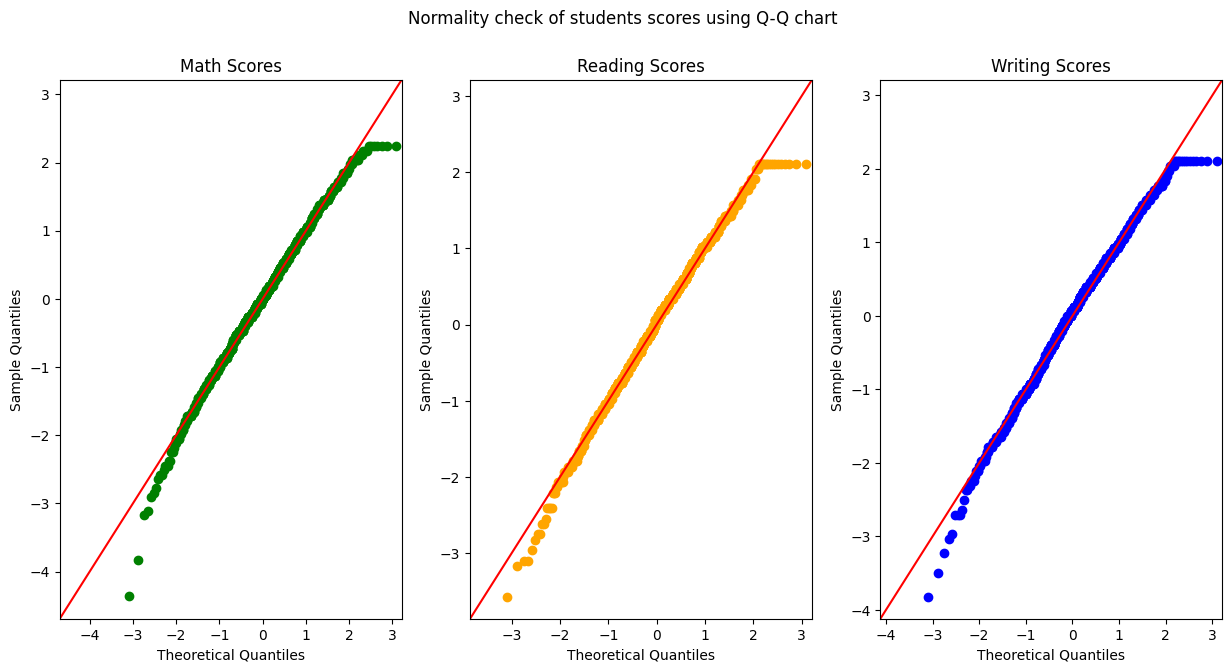

In [60]:
import statsmodels.api as sm # to build the Q-Q graph
# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,figsize=(15, 7))


sm.qqplot(df['math score'], markerfacecolor = "green", markeredgecolor = "green", line='45',  fit = True, ax=ax1)
ax1.set_title("Math Scores")

sm.qqplot(df['reading score'], markerfacecolor = "orange", markeredgecolor = "orange", line='45', fit = True, ax=ax2)
ax2.set_title("Reading Scores")

sm.qqplot(df['writing score'], markerfacecolor = "blue", markeredgecolor = "blue", line='45', fit = True, ax=ax3)
ax3.set_title("Writing Scores")

# Set the global title
plt.suptitle("Normality check of students scores using Q-Q chart")

plt.show()

 #### Insights
  - There exists correlation between students scores and the normal distribution line. This means that our data is very close to Gaussian!